In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
hotel_df = pd.read_csv('../data/hotel_bookings.csv')

In [4]:
hotel_df.shape

(119390, 32)

In [5]:
hotel_df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [6]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
for col in hotel_df:
    print(hotel_df['hotel'].unique())

['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']
['Resort Hotel' 'City Hotel']


C:\Users\joshy\AppData\Local\Temp\ipykernel_26052\2577803895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hotel_df.corr()


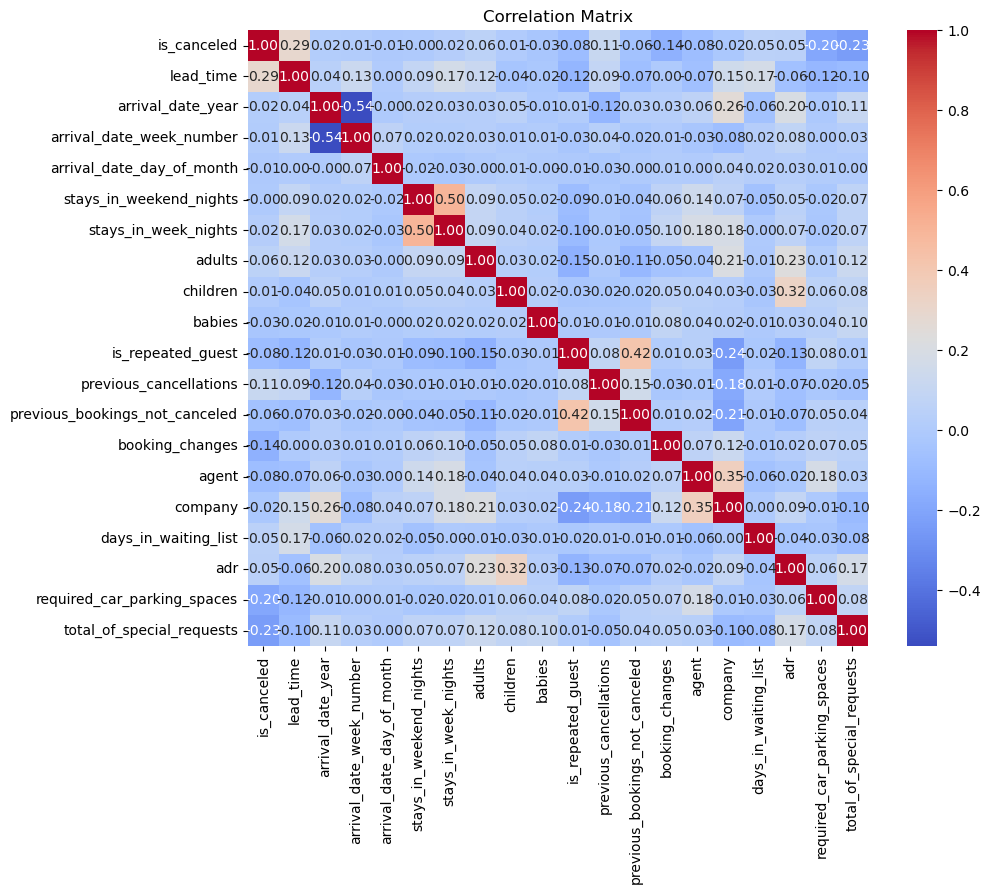

In [9]:
correlation_matrix = hotel_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

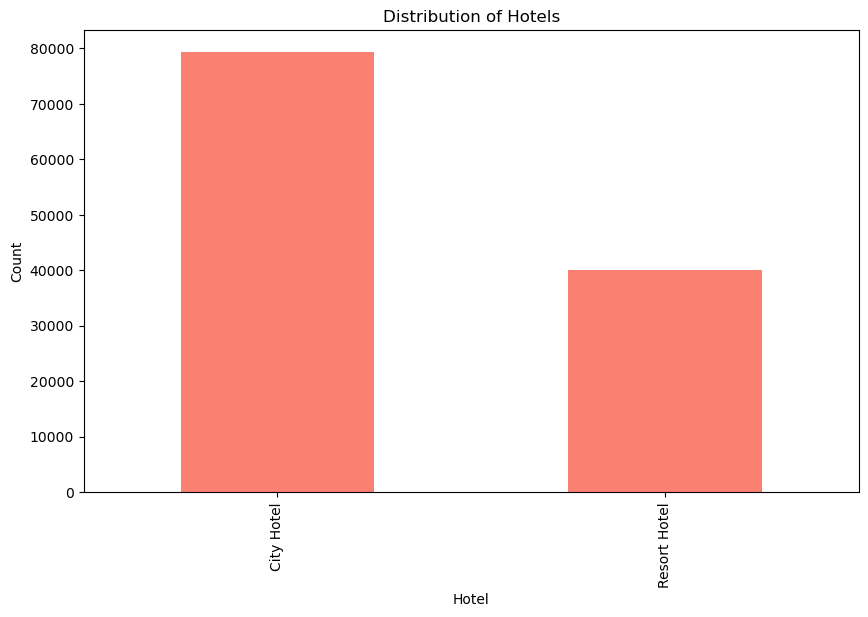

In [10]:
plt.figure(figsize=(10, 6))
hotel_df["hotel"].value_counts().plot(kind="bar", color="salmon")
plt.xlabel("Hotel")
plt.ylabel("Count")
plt.title("Distribution of Hotels")
plt.show()

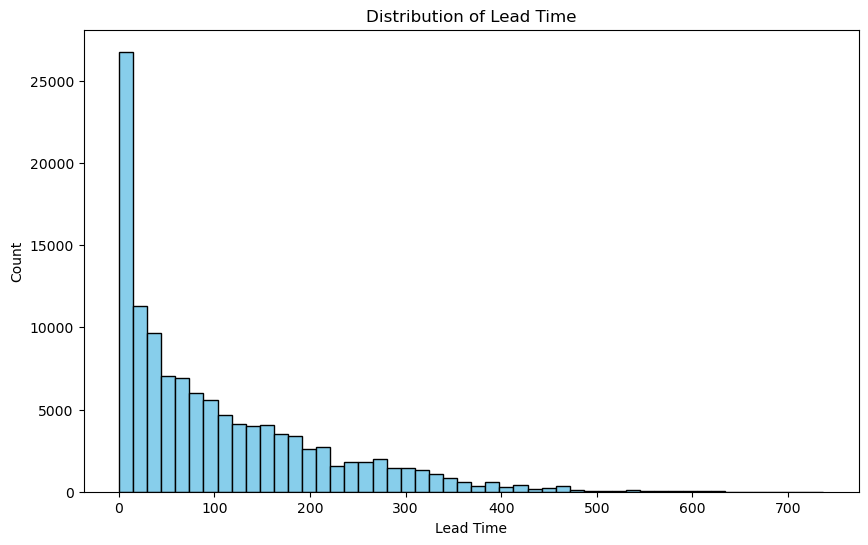

In [11]:
import matplotlib.pyplot as plt

# Example of plotting numerical columns (you can plot others as needed)
plt.figure(figsize=(10, 6))
plt.hist(hotel_df["lead_time"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Lead Time")
plt.ylabel("Count")
plt.title("Distribution of Lead Time")
plt.show()

In [13]:
import pandas as pd
import statsmodels.api as sm

X = hotel_df['lead_time']
y = hotel_df['is_canceled']

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.616290
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119390
Model:                          Logit   Df Residuals:                   119388
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                 0.06506
Time:                        10:54:39   Log-Likelihood:                -73579.
converged:                       True   LL-Null:                       -78699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1656      0.009   -126.940      0.000      -1.184      -1.148
lead_time      0.0059   6.14e